In [2]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_and_auc(split_index, run_index, results_path="/home/mezher/Documents/Deauville_DeepLearning/training_results"):
    """
    Plots training & validation loss and AUC from a CSV file based on split and run index.
    
    Parameters:
    - split_index (int): The split index of the dataset.
    - run_index (int): The run index of the model.
    - results_path (str): Path to the results directory (default is 'results').
    """
    # Load the CSV file
    file_path = f"{results_path}/convergence_split{split_index}_run{run_index}.csv"
    df = pd.read_csv(file_path)
    
    # ------------------ Plot for Loss ------------------
    df_train_loss = df[(df['split'] == 'train') & (df['metric'] == 'loss')].copy()
    df_val_loss = df[(df['split'] == 'validation') & (df['metric'] == 'loss')].copy()
    
    # Convert 'value' to numeric
    df_train_loss['value'] = pd.to_numeric(df_train_loss['value'], errors='coerce')
    df_val_loss['value'] = pd.to_numeric(df_val_loss['value'], errors='coerce')
    
    # Drop NaN values
    df_train_loss.dropna(subset=['value'], inplace=True)
    df_val_loss.dropna(subset=['value'], inplace=True)
    
    # Group by epoch and average
    train_loss_by_epoch = df_train_loss.groupby("epoch")["value"].mean().reset_index()
    val_loss_by_epoch = df_val_loss.groupby("epoch")["value"].mean().reset_index()
    
    # Sort by epoch
    train_loss_by_epoch.sort_values("epoch", inplace=True)
    val_loss_by_epoch.sort_values("epoch", inplace=True)
    
    # Plot Loss
    plt.figure(figsize=(8, 5))
    plt.plot(train_loss_by_epoch["epoch"], train_loss_by_epoch["value"], marker="o", linestyle="-", label="Training Loss")
    plt.plot(val_loss_by_epoch["epoch"], val_loss_by_epoch["value"], marker="o", linestyle="-", label="Validation Loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()
    
    # ------------------ Plot for AUC ------------------
    df_train_auc = df[(df['split'] == 'train') & (df['metric'] == 'auc')].copy()
    df_val_auc = df[(df['split'] == 'validation') & (df['metric'] == 'auc')].copy()
    
    # Convert 'value' to numeric
    df_train_auc['value'] = pd.to_numeric(df_train_auc['value'], errors='coerce')
    df_val_auc['value'] = pd.to_numeric(df_val_auc['value'], errors='coerce')
    
    # Drop NaN values
    df_train_auc.dropna(subset=['value'], inplace=True)
    df_val_auc.dropna(subset=['value'], inplace=True)
    
    # Group by epoch and average
    train_auc_by_epoch = df_train_auc.groupby("epoch")["value"].mean().reset_index()
    val_auc_by_epoch = df_val_auc.groupby("epoch")["value"].mean().reset_index()
    
    # Sort by epoch
    train_auc_by_epoch.sort_values("epoch", inplace=True)
    val_auc_by_epoch.sort_values("epoch", inplace=True)
    
    # Plot AUC
    plt.figure(figsize=(8, 5))
    plt.plot(train_auc_by_epoch["epoch"], train_auc_by_epoch["value"], marker="o", linestyle="-", label="Train AUC")
    plt.plot(val_auc_by_epoch["epoch"], val_auc_by_epoch["value"], marker="o", linestyle="-", label="Validation AUC")
    plt.xlabel("Epoch")
    plt.ylabel("AUC")
    plt.title("Training and Validation AUC over Epochs")
    plt.grid(True)
    plt.legend()
    plt.show()




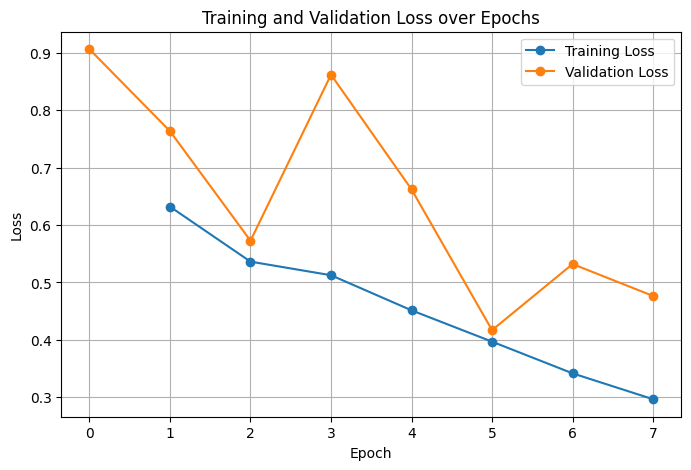

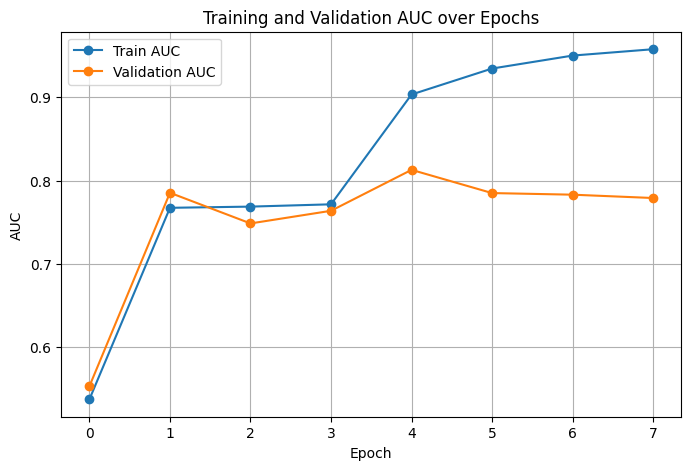

In [12]:
plot_loss_and_auc(6,7) 

PEUT ETRE LES FAIRE SANS EARLY STOPPING COMME CA ON VOIT BIEN 

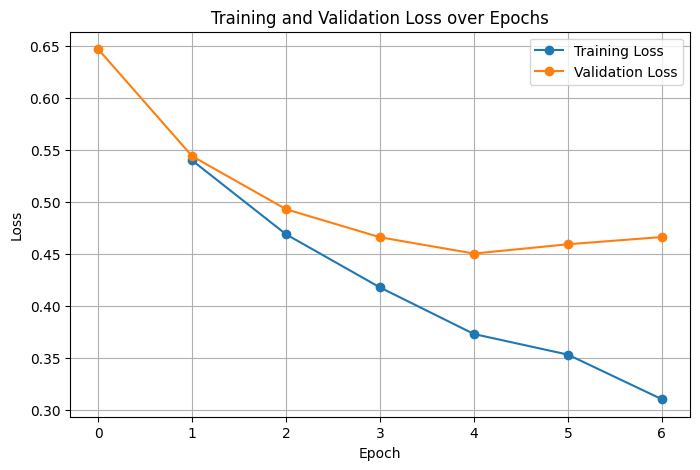

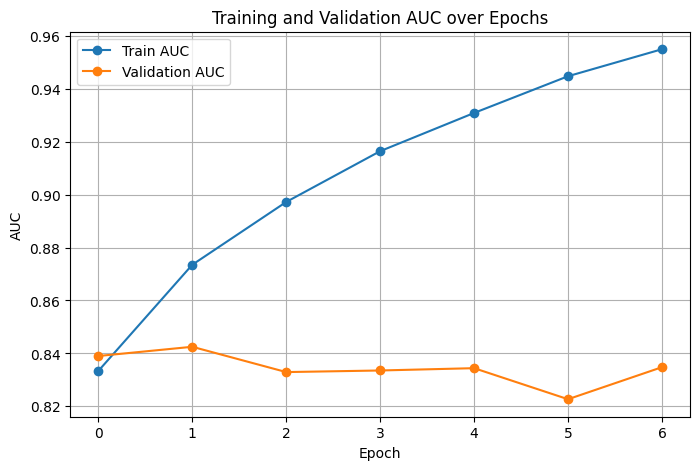

In [13]:
plot_loss_and_auc(5,12) 